<a href="https://colab.research.google.com/github/Rushabhtikale92/Online-Retail-Customer-Segmentation/blob/main/Copy_of_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import warnings
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/CSV/Online Retail.xlsx - Online Retail.csv')

# **Sample Data**

In [4]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

# **Checking the dataset**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# **Droping Null Value**

In [6]:
# Droping null values from the dataset
data.dropna(inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [8]:
data.shape 

(406829, 8)

**The 'InvoiceNo' feature is contain the data starting with C that indicates a cancellation of transaction. So we just to remove that feature. **

In [9]:
data = data[~data['InvoiceNo'].str.contains('C')]

In [10]:
data.shape 

(397924, 8)

In [11]:
Description_data = data['Description'].value_counts().reset_index()
Description_data.rename(columns = {'index' : 'Description Name'}, inplace = True)
Description_data.rename(columns = {'Description' : 'Count'}, inplace = True)
Description_data.head()

Description Name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2028
1            REGENCY CAKESTAND 3 TIER   1724
2             JUMBO BAG RED RETROSPOT   1618
3       ASSORTED COLOUR BIRD ORNAMENT   1408
4                       PARTY BUNTING   1397

In [12]:
Description_data.tail()

Description Name  Count
3872      RUBY GLASS CLUSTER EARRINGS      1
3873   PINK CHRYSANTHEMUMS ART FLOWER      1
3874  72 CAKE CASES VINTAGE CHRISTMAS      1
3875     WALL ART , THE MAGIC FOREST       1
3876      PAPER CRAFT , LITTLE BIRDIE      1

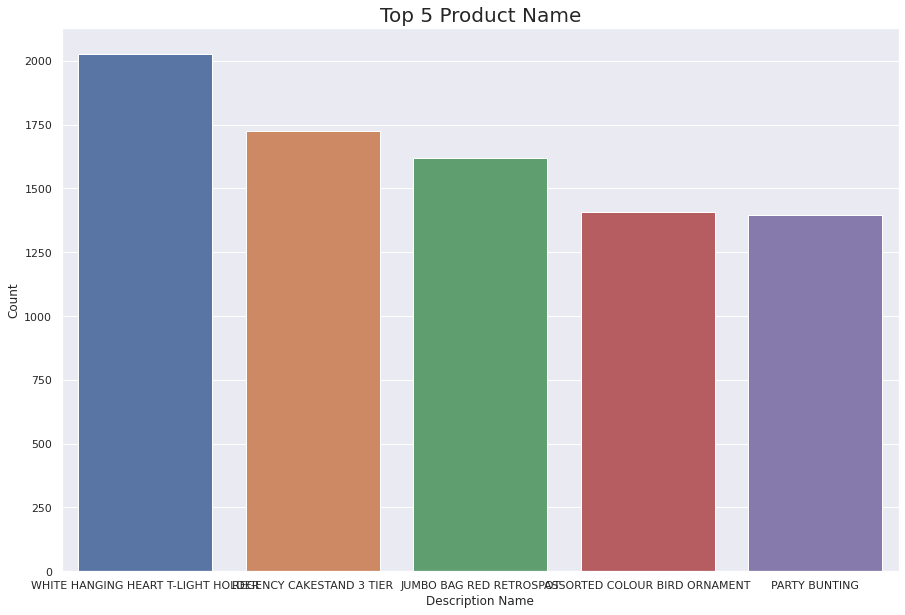

In [13]:
plt.figure(figsize=(15,10))
plt.title('Top 5 Product Name',fontsize=20)
sns.barplot(x='Description Name',y='Count',data=Description_data[:5])

From the above graph we can conclude that this product are among top five selled and most of the customer are purchasing this product, so this is well high in demand.

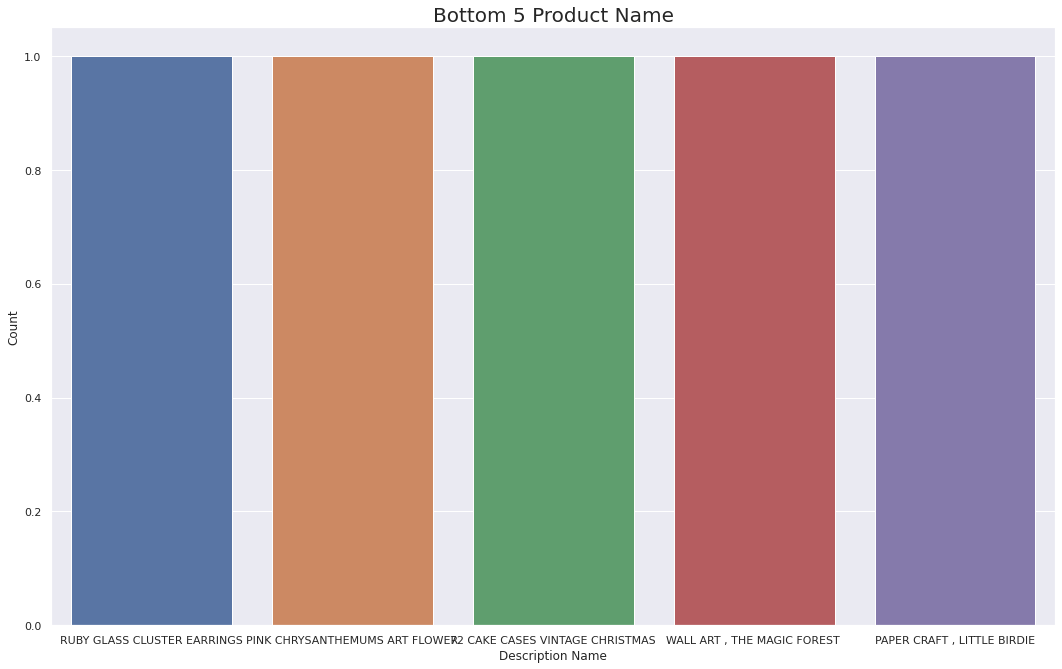

In [14]:
plt.figure(figsize=(18,11))
plt.title('Bottom 5 Product Name',fontsize=20)
sns.barplot(x='Description Name',y='Count',data=Description_data[-5:])

From the above graph we can conclude that this product are among bottom five selled and most of the customer are avoiding this product, so this is well not in high demand.

In [15]:
StockCode_data = data['StockCode'].value_counts().reset_index()
StockCode_data.rename(columns = {'index' : 'StockCode_Name'}, inplace = True)
StockCode_data.rename(columns = {'StockCode' : 'Count'}, inplace = True)
StockCode_data.head()

StockCode_Name  Count
0         85123A   2035
1          22423   1724
2         85099B   1618
3          84879   1408
4          47566   1397

In [16]:
StockCode_data.tail()

StockCode_Name  Count
3660          90168      1
3661          90169      1
3662         90202A      1
3663          90118      1
3664          23843      1

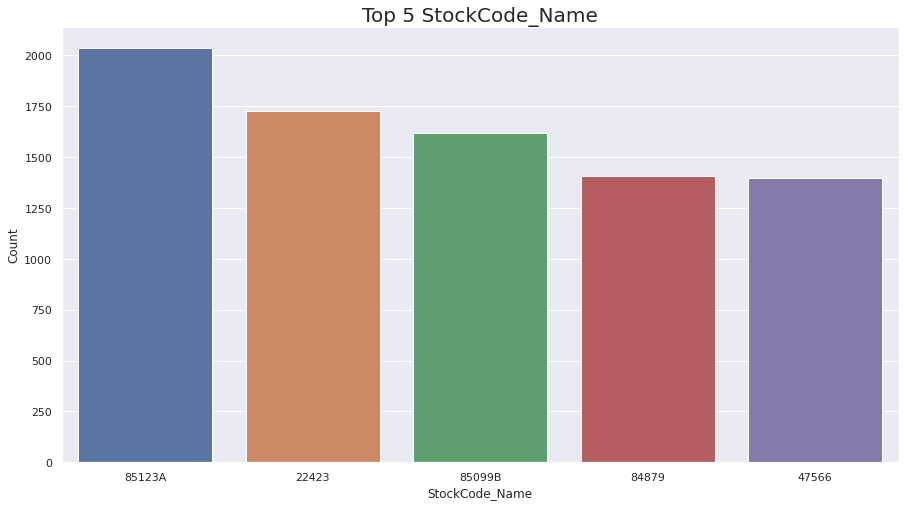

In [17]:
plt.figure(figsize=(15,8))
plt.title('Top 5 StockCode_Name',fontsize=20)
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_data[:5])

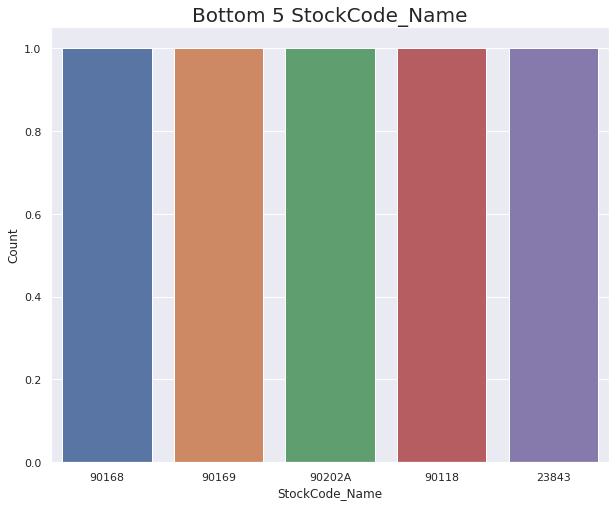

In [18]:
plt.figure(figsize=(10,8))
plt.title('Bottom 5 StockCode_Name',fontsize=20)
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_data[-5:])

# **Country Analysis**

In [19]:
Country_data = data['Country'].value_counts().reset_index()
Country_data.rename(columns = {'index' : 'Country_Name'}, inplace = True)
Country_data.rename(columns = {'Country' : 'Count'}, inplace = True)
Country_data.head()

Country_Name   Count
0  United Kingdom  354345
1         Germany    9042
2          France    8342
3            EIRE    7238
4           Spain    2485

In [20]:
Country_data.tail()

Country_Name  Count
32       Lithuania     35
33          Brazil     32
34  Czech Republic     25
35         Bahrain     17
36    Saudi Arabia      9

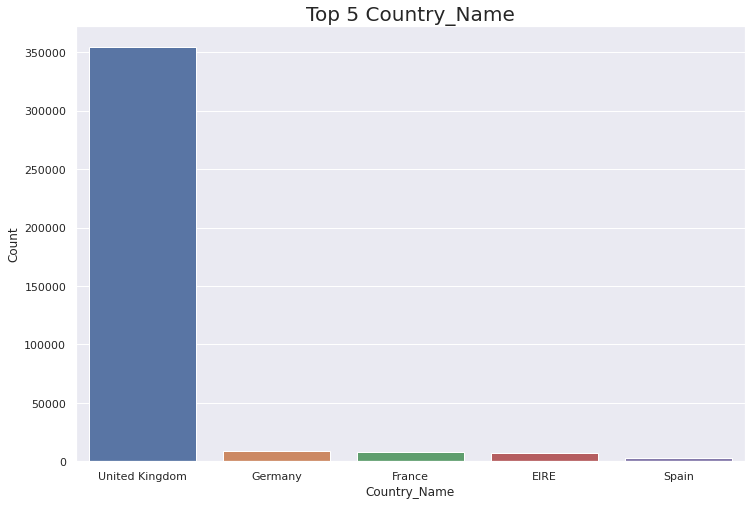

In [21]:
plt.figure(figsize=(12,8))
plt.title('Top 5 Country_Name',fontsize=20)
sns.barplot(x='Country_Name',y='Count',data=Country_data[:5])

From the above graph we can easily say that country like united kingdom is have higher transaction as compared to other countries, it means that the united kingdom have higher purchasing chance as compared to Germany, France, EIRE and Spain.

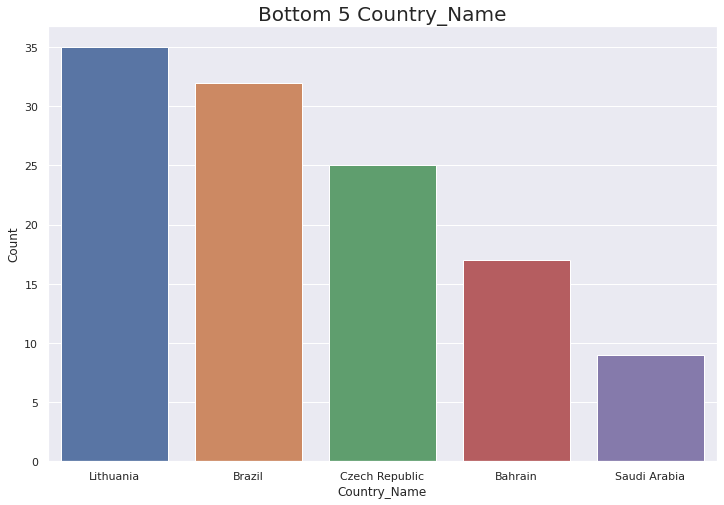

In [22]:
plt.figure(figsize=(12,8))
plt.title('Bottom 5 Country_Name',fontsize=20)
sns.barplot(x='Country_Name',y='Count',data=Country_data[-5:])

The Saudi Arabia has the lowest purchasing history, so we don't will focus more on this five country for analyse the customer.